Notebook by Andrew Frank Schober on 11/08/19

In [1]:
%matplotlib inline
%load_ext line_profiler
import coevo2 as ce
import numpy as np
import itertools as it
import copy
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random
import copy

In [2]:
import seaborn as sns; sns.set() 

In [3]:
# Load in my ProtSet, phylo2, mt_mat2, and the corresponding sca_intrxn matrix
ps,phylo2,mt_mat2,sca_intrxn = np.load('team3_results1.npy',encoding='latin1')

In [4]:
# Binary matrix indicating protein-protein interactions between alignment halves
sameProt,physInt,enzInt = np.load('team3_truthtables.npy',encoding='latin1')

In [5]:
# Protein-half pairs with no biological interaction
negatives = 1-(np.eye(36)+sameProt+physInt+enzInt)

In [6]:
# mt results broken up by sameProt, physInt, enzyInt and negatives
mt_samp = map(lambda mat: mt_mat2[np.triu(mat.astype(bool))].flatten(),[sameProt,physInt,enzInt,negatives])

In [7]:
# sca results broken up by sameProt, physInt, enzyInt and negatives
sca_samp = map(lambda mat: sca_intrxn[np.triu(mat.astype(bool))].flatten(),[sameProt,physInt,enzInt,negatives])

In [27]:
sns.set_palette('colorblind')
sns.set_style('darkgrid')
sns.set_context('paper')

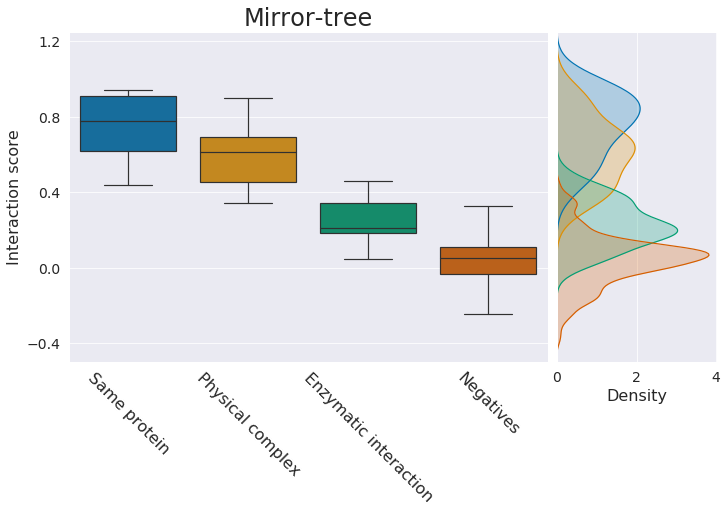

In [78]:
data = mt_samp
f, (a0, a1) = plt.subplots(1, 2, figsize=(10,7),gridspec_kw={'width_ratios': [3, 1]})
sns.boxplot(data=data,showfliers=False,ax=a0);

a0.tick_params(axis='y',labelsize=14)
a0.set_yticks([-0.4,0,0.4,0.8,1.2])
a0.set_ylim([-.5,1.25]);
a0.set_ylabel('Interaction score',fontsize=16)
a0.set_title('Mirror-tree',fontsize=24)
a0.set_xticklabels(['Same protein','Physical complex', 'Enzymatic interaction', 'Negatives'],fontsize=16,rotation=-45)

for samp in data: sns.kdeplot(samp, shade=True, vertical=True, ax=a1);
a1.set_yticks([])
a1.tick_params(labelsize=14)
a1.set_ylim([-.5,1.25]);
a1.set_xlabel('Density',fontsize=16)

plt.tight_layout(pad=0.3, w_pad=-.1)
f.savefig('mt_boxplots.pdf',bbox_inches='tight')

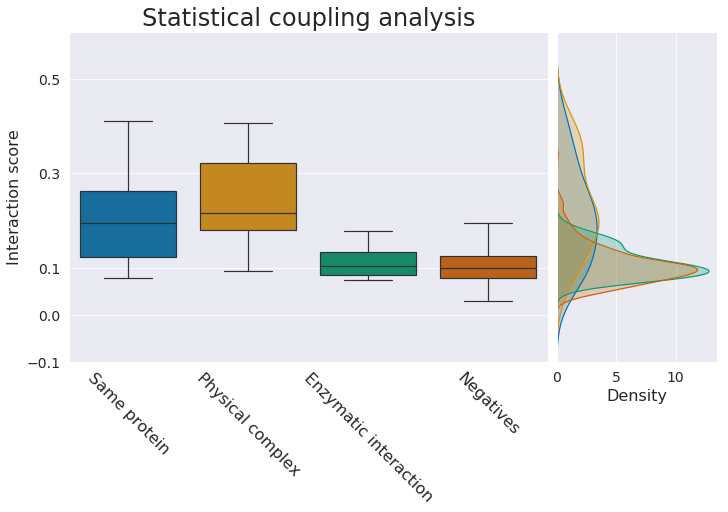

In [79]:
data = sca_samp
f, (a0, a1) = plt.subplots(1, 2, figsize=(10,7),gridspec_kw={'width_ratios': [3, 1]})
sns.boxplot(data=data,showfliers=False,ax=a0);

a0.tick_params(axis='y',labelsize=14)
a0.set_yticks([-0.1,0,0.1,0.3,0.5])
a0.set_ylim([-.1,0.6]);
a0.set_ylabel('Interaction score',fontsize=16)
a0.set_title('Statistical coupling analysis',fontsize=24)
a0.set_xticklabels(['Same protein','Physical complex', 'Enzymatic interaction', 'Negatives'],fontsize=16,rotation=-45)

for samp in data: sns.kdeplot(samp, shade=True, vertical=True, ax=a1);
a1.set_yticks([])
a1.tick_params(labelsize=14)
a1.set_ylim([-.1,0.6]);
a1.set_xlabel('Density',fontsize=16)

plt.tight_layout(pad=0.3, w_pad=-.1)
f.savefig('sca_boxplots.pdf',bbox_inches='tight')